In [1]:
# Execute this first 
#
#  * trigger notebook styling
#  * check if notebook had been modified since its distribution
# 
# Note: executing any cells before this modifies the notebook.
# 
%run src/init_notebooks.py
hide_toggle()
#check_notebook()

In [2]:
import nglview as ng
import pandas as pd
import mdtraj as md
import numpy as np

In [3]:
# Go To Methane directory and use 94K
%cd ~/gromacs/build/Titan/methane/94K
!ls

/home/dragns/gromacs/build/Titan/methane/94K
BackupDOS.py	HiRESpeaks.py	  npt2.edr  OLD_methaneDOS.py
box.gro		mdout.mdp	  npt2.gro  peaks.py
convert_dos.py	methane_bonds.py  npt2.log  potential.xvg
density1.xvg	methaneDOS.py	  npt2.mdp  pressure2.xvg
density2.xvg	methane.gro	  npt2.tpr  pressure.xvg
DOScheck	methane.pdb	  npt2.trr  production.mdp
DOS.py		npt1.cpt	  npt.mdp   ps2cm.py
dt_05		npt1.edr	  nvt.cpt   results_dt01
em.edr		npt1.gro	  nvt.edr   Results_index1
em.gro		npt1.log	  nvt.gro   results_noIndex
em.log		npt1.mdp	  nvt.log   SetupDOS
em.mdp		npt1.tpr	  nvt.mdp   temperature.xvg
em.tpr		npt1.trr	  nvt.tpr   topol.top
em.trr		npt2.cpt	  nvt.trr   view_trajectory.py


In [4]:
# Load and view the .pdb or .gro file with the following lines
view = ng.show_structure_file("methane.pdb")
view

NGLWidget()

In [5]:
# Create larger box to grow simulation
!gmx editconf -f methane.pdb -o box.gro -box 2.8 2.8 2.8 -noc

# Add the Methane Molecules to the larger box
!gmx insert-molecules -ci methane.pdb -nmol 200 -box 2.8 2.8 2.8 -o methane.gro -seed 12345 -try 10000

               :-) GROMACS - gmx editconf, 2024.3-conda_forge (-:

Executable:   /home/dragns/miniconda3/envs/md-intro-tutorial/bin.SSE2/gmx
Data prefix:  /home/dragns/miniconda3/envs/md-intro-tutorial
Working dir:  /home/dragns/gromacs/build/Titan/methane/94K
Command line:
  gmx editconf -f methane.pdb -o box.gro -box 2.8 2.8 2.8 -noc

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 5 atoms
No velocities found
new box vectors :  2.800  2.800  2.800 (nm)
new box angles  :  90.00  90.00  90.00 (degrees)
new box volume  :  21.95               (nm^3)

GROMACS reminds you: "Why, how now, Claudio ! Whence Comes this Restraint ?" (Lucio in Measure for measure, Act 1, Scene 4, William Shakespeare)

           :-) GROMACS - gmx insert-molecules, 2024.3-conda_forge (-:

Executable:   /home/dragns/miniconda3/envs/md-intro-tutorial/bin.SSE2/gmx
Data prefix:  /home/dragns/miniconda3/envs/md-intro-tutorial
Working dir:  /home/dragns/gromacs/build/T

In [6]:
# View the system
view = ng.show_structure_file("methane.gro")
view.add_representation(repr_type='ball+stick', selection='SOL')
view.camera='orthographic'
view

NGLWidget()

In [7]:
#Energy Minimization
!gmx grompp -f em.mdp -c methane.gro -p topol.top -o em.tpr
!gmx mdrun -deffnm em -ntmpi 1 -ntomp 1

                :-) GROMACS - gmx grompp, 2024.3-conda_forge (-:

Executable:   /home/dragns/miniconda3/envs/md-intro-tutorial/bin.SSE2/gmx
Data prefix:  /home/dragns/miniconda3/envs/md-intro-tutorial
Working dir:  /home/dragns/gromacs/build/Titan/methane/94K
Command line:
  gmx grompp -f em.mdp -c methane.gro -p topol.top -o em.tpr

Ignoring obsolete mdp entry 'ns_type'

NOTE 1 [file em.mdp]:
  With Verlet lists the optimal nstlist is >= 10, with GPUs >= 20. Note
  that with the Verlet scheme, nstlist has no effect on the accuracy of
  your simulation.

Setting the LD random seed to -1623474450

Generated 330891 of the 330891 non-bonded parameter combinations
Generating 1-4 interactions: fudge = 0.5

Generated 330891 of the 330891 1-4 parameter combinations

Excluding 3 bonded neighbours molecule type 'CH4'
Analysing residue names:
There are:   200      Other residues
Analysing residues not classified as Protein/DNA/RNA/Water and splitting into groups...
Number of degrees of freedom i

In [8]:
#Analyze results of EM
!printf "Potential\n0\n" | gmx energy -f em.edr -o potential.xvg -xvg none

                :-) GROMACS - gmx energy, 2024.3-conda_forge (-:

Executable:   /home/dragns/miniconda3/envs/md-intro-tutorial/bin.SSE2/gmx
Data prefix:  /home/dragns/miniconda3/envs/md-intro-tutorial
Working dir:  /home/dragns/gromacs/build/Titan/methane/94K
Command line:
  gmx energy -f em.edr -o potential.xvg -xvg none

Opened em.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-------------------------------------------------------------------
  1  Bond             2  Angle            3  LJ-(SR)          4  Disper.-corr. 
  5  Coulomb-(SR)     6  Coul.-recip.     7  Potential        8  Pres.-DC      
  9  Pressure        10  Vir-XX          11  Vir-XY          12  Vir-XZ        
 13  Vir-YX          14  Vir-YY          15  Vir-YZ          16  Vir-ZX        
 17  Vir-ZY          18  Vir-ZZ          19  Pres-XX         20  Pres-

<Axes: xlabel='step'>

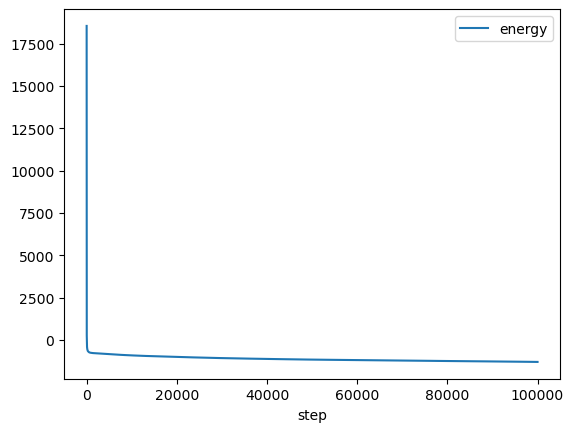

In [9]:
# Print graph
df = pd.read_csv('potential.xvg', sep='\\s+', header=None, names=['step','energy'])
df.plot('step')

In [ ]:
# Temperature EQ T=94K
!gmx grompp -f nvt.mdp -c em.gro -r em.gro -p topol.top -o nvt.tpr 
!gmx mdrun -ntmpi 1 -ntomp 6 -v -deffnm nvt

                :-) GROMACS - gmx grompp, 2024.3-conda_forge (-:

Executable:   /home/dragns/miniconda3/envs/md-intro-tutorial/bin.SSE2/gmx
Data prefix:  /home/dragns/miniconda3/envs/md-intro-tutorial
Working dir:  /home/dragns/gromacs/build/Titan/methane/94K
Command line:
  gmx grompp -f nvt.mdp -c em.gro -r em.gro -p topol.top -o nvt.tpr

Ignoring obsolete mdp entry 'ns_type'
Setting the LD random seed to -218113037

Generated 330891 of the 330891 non-bonded parameter combinations
Generating 1-4 interactions: fudge = 0.5

Generated 330891 of the 330891 1-4 parameter combinations

Excluding 3 bonded neighbours molecule type 'CH4'

Setting gen_seed to -7472353

Velocities were taken from a Maxwell distribution at 94 K
Analysing residue names:
There are:   200      Other residues
Analysing residues not classified as Protein/DNA/RNA/Water and splitting into groups...
Number of degrees of freedom in T-Coupling group System is 2997.00

The largest distance between excluded atoms is 0.179 n

In [4]:
# Analyze Temp run
!echo "Temperature" | gmx energy -f nvt.edr -o temperature.xvg -xvg none -b 20

                :-) GROMACS - gmx energy, 2024.3-conda_forge (-:

Executable:   /home/dragns/miniconda3/envs/md-intro-tutorial/bin.SSE2/gmx
Data prefix:  /home/dragns/miniconda3/envs/md-intro-tutorial
Working dir:  /home/dragns/gromacs/build/Titan/methane/94K
Command line:
  gmx energy -f nvt.edr -o temperature.xvg -xvg none -b 20

Opened nvt.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-------------------------------------------------------------------
  1  Bond             2  Angle            3  LJ-(SR)          4  Disper.-corr. 
  5  Coulomb-(SR)     6  Coul.-recip.     7  Potential        8  Kinetic-En.   
  9  Total-Energy    10  Conserved-En.   11  Temperature     12  Pres.-DC      
 13  Pressure        14  Vir-XX          15  Vir-XY          16  Vir-XZ        
 17  Vir-YX          18  Vir-YY          19  Vir-YZ         

<Axes: xlabel='time'>

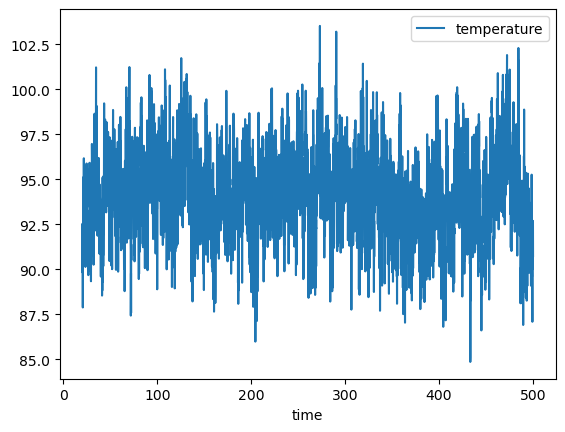

In [5]:
# Plot Temp data
df = pd.read_csv('temperature.xvg', sep='\\s+', header=None, names=['time','temperature'])
df.plot('time')
#!echo "Temperature" | gmx energy -f nvt.edr -o temperature.xvg -b 20
#!xmgrace temperature.xvg

In [6]:
# Pressure EQ P = 1.5 bars
!gmx grompp -f npt1.mdp -c nvt.gro -r nvt.gro -t nvt.cpt -p topol.top -o npt1.tpr -maxwarn 1
!gmx mdrun -ntmpi 1 -ntomp 13 -v -deffnm npt1

                :-) GROMACS - gmx grompp, 2024.3-conda_forge (-:

Executable:   /home/dragns/miniconda3/envs/md-intro-tutorial/bin.SSE2/gmx
Data prefix:  /home/dragns/miniconda3/envs/md-intro-tutorial
Working dir:  /home/dragns/gromacs/build/Titan/methane/94K
Command line:
  gmx grompp -f npt1.mdp -c nvt.gro -r nvt.gro -t nvt.cpt -p topol.top -o npt1.tpr -maxwarn 1

Ignoring obsolete mdp entry 'ns_type'

WARNING 1 [file npt1.mdp]:
  The Berendsen barostat does not generate any strictly correct ensemble,
  and should not be used for new production simulations (in our opinion).
  We recommend using the C-rescale barostat instead.

Setting the LD random seed to -604253353

Generated 330891 of the 330891 non-bonded parameter combinations
Generating 1-4 interactions: fudge = 0.5

Generated 330891 of the 330891 1-4 parameter combinations

Excluding 3 bonded neighbours molecule type 'CH4'
Analysing residue names:
There are:   200      Other residues
Analysing residues not classified as Protei

In [7]:
# Analyze Pressure Data
!echo "Pressure" | gmx energy -f npt1.edr -o pressure.xvg -xvg none

                :-) GROMACS - gmx energy, 2024.3-conda_forge (-:

Executable:   /home/dragns/miniconda3/envs/md-intro-tutorial/bin.SSE2/gmx
Data prefix:  /home/dragns/miniconda3/envs/md-intro-tutorial
Working dir:  /home/dragns/gromacs/build/Titan/methane/94K
Command line:
  gmx energy -f npt1.edr -o pressure.xvg -xvg none

Opened npt1.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-------------------------------------------------------------------
  1  Bond             2  Angle            3  LJ-(SR)          4  Disper.-corr. 
  5  Coulomb-(SR)     6  Coul.-recip.     7  Potential        8  Kinetic-En.   
  9  Total-Energy    10  Conserved-En.   11  Temperature     12  Pres.-DC      
 13  Pressure        14  Box-X           15  Box-Y           16  Box-Z         
 17  Volume          18  Density         19  pV              20  En

<Axes: xlabel='time'>

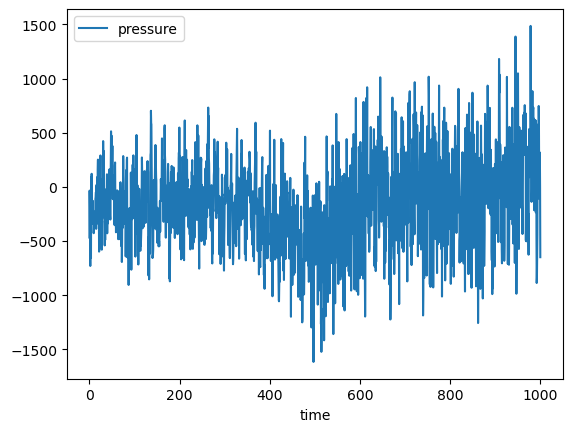

In [8]:
df = pd.read_csv('pressure.xvg', sep='\\s+', header=None, names=['time','pressure'])
df.plot('time')

In [ ]:
#!echo "Pressure" | gmx energy -f npt.edr -o pressure.xvg
#!xmgrace pressure.xvg

In [9]:
# Look at density of system
!echo "Density" | gmx energy -f npt1.edr -o density1.xvg -xvg none

                :-) GROMACS - gmx energy, 2024.3-conda_forge (-:

Executable:   /home/dragns/miniconda3/envs/md-intro-tutorial/bin.SSE2/gmx
Data prefix:  /home/dragns/miniconda3/envs/md-intro-tutorial
Working dir:  /home/dragns/gromacs/build/Titan/methane/94K
Command line:
  gmx energy -f npt1.edr -o density1.xvg -xvg none

Opened npt1.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-------------------------------------------------------------------
  1  Bond             2  Angle            3  LJ-(SR)          4  Disper.-corr. 
  5  Coulomb-(SR)     6  Coul.-recip.     7  Potential        8  Kinetic-En.   
  9  Total-Energy    10  Conserved-En.   11  Temperature     12  Pres.-DC      
 13  Pressure        14  Box-X           15  Box-Y           16  Box-Z         
 17  Volume          18  Density         19  pV              20  En

<Axes: xlabel='time'>

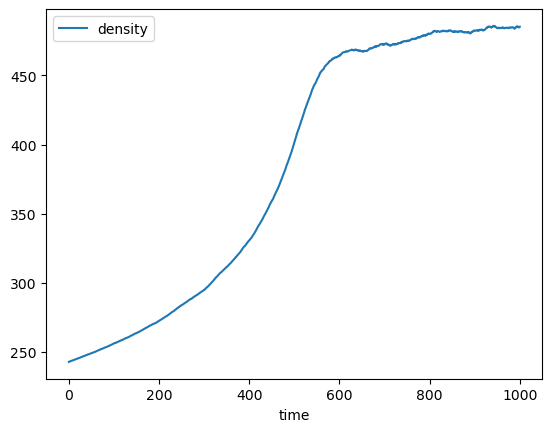

In [10]:
#Plot density
df = pd.read_csv('density1.xvg', sep='\\s+', header=None, names=['time','density'])
df.plot('time')

In [11]:
!tail -1 npt1.gro

   2.22269   2.22269   2.22269


In [ ]:
#!gmx editconf -f npt1.gro -o npt1_expanded.gro -box 2.2 2.2 2.2 -c

In [6]:
# Pressure EQ Stage 2
!gmx grompp -f npt2.mdp -c npt1.gro -p topol.top -o npt2.tpr -maxwarn 1
!gmx mdrun -ntmpi 1 -ntomp 6 -v -deffnm npt2

                :-) GROMACS - gmx grompp, 2024.3-conda_forge (-:

Executable:   /home/dragns/miniconda3/envs/md-intro-tutorial/bin.SSE2/gmx
Data prefix:  /home/dragns/miniconda3/envs/md-intro-tutorial
Working dir:  /home/dragns/gromacs/build/Titan/methane/94K
Command line:
  gmx grompp -f npt2.mdp -c npt1.gro -p topol.top -o npt2.tpr -maxwarn 1

Ignoring obsolete mdp entry 'ns_type'
Setting the LD random seed to -102264837

Generated 330891 of the 330891 non-bonded parameter combinations
Generating 1-4 interactions: fudge = 0.5

Generated 330891 of the 330891 1-4 parameter combinations

Excluding 3 bonded neighbours molecule type 'CH4'
Analysing residue names:
There are:   200      Other residues
Analysing residues not classified as Protein/DNA/RNA/Water and splitting into groups...
Number of degrees of freedom in T-Coupling group System is 2997.00

The largest distance between excluded atoms is 0.189 nm between atom 248 and 249

Determining Verlet buffer for a tolerance of 0.005 kJ/mo

                :-) GROMACS - gmx energy, 2024.3-conda_forge (-:

Executable:   /home/dragns/miniconda3/envs/md-intro-tutorial/bin.SSE2/gmx
Data prefix:  /home/dragns/miniconda3/envs/md-intro-tutorial
Working dir:  /home/dragns/gromacs/build/Titan/methane/94K
Command line:
  gmx energy -f npt2.edr -o pressure2.xvg -xvg none

Opened npt2.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-------------------------------------------------------------------
  1  Bond             2  Angle            3  LJ-(SR)          4  Disper.-corr. 
  5  Coulomb-(SR)     6  Coul.-recip.     7  Potential        8  Kinetic-En.   
  9  Total-Energy    10  Conserved-En.   11  Temperature     12  Pres.-DC      
 13  Pressure        14  Box-X           15  Box-Y           16  Box-Z         
 17  Volume          18  Density         19  pV              20  E

<Axes: xlabel='time'>

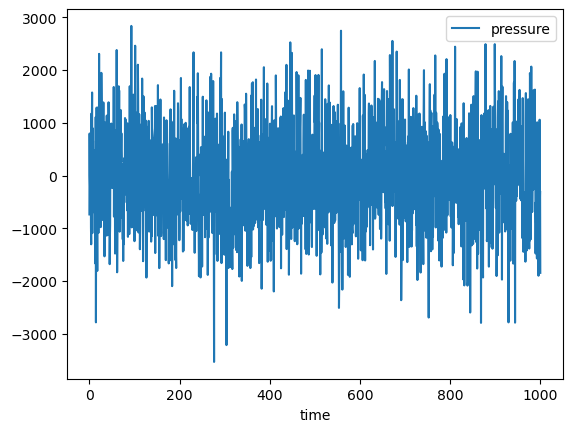

In [13]:
# Analyze Pressure Data
!echo "Pressure" | gmx energy -f npt2.edr -o pressure2.xvg -xvg none

df = pd.read_csv('pressure2.xvg', sep='\\s+', header=None, names=['time','pressure'])
df.plot('time')

                :-) GROMACS - gmx energy, 2024.3-conda_forge (-:

Executable:   /home/dragns/miniconda3/envs/md-intro-tutorial/bin.SSE2/gmx
Data prefix:  /home/dragns/miniconda3/envs/md-intro-tutorial
Working dir:  /home/dragns/gromacs/build/Titan/methane/94K
Command line:
  gmx energy -f npt2.edr -o density2.xvg -xvg none

Opened npt2.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-------------------------------------------------------------------
  1  Bond             2  Angle            3  LJ-(SR)          4  Disper.-corr. 
  5  Coulomb-(SR)     6  Coul.-recip.     7  Potential        8  Kinetic-En.   
  9  Total-Energy    10  Conserved-En.   11  Temperature     12  Pres.-DC      
 13  Pressure        14  Box-X           15  Box-Y           16  Box-Z         
 17  Volume          18  Density         19  pV              20  En

<Axes: xlabel='time'>

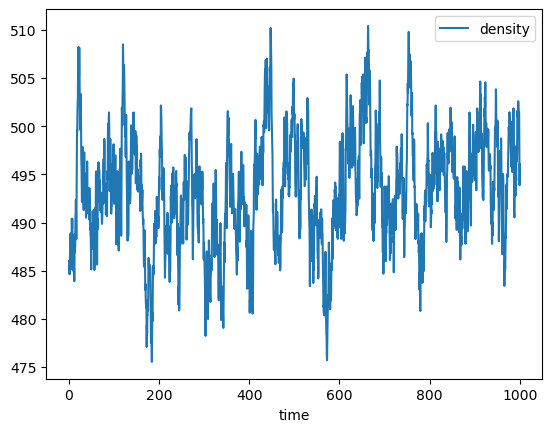

In [14]:
# Look at density of system
!echo "Density" | gmx energy -f npt2.edr -o density2.xvg -xvg none

#Plot density
df = pd.read_csv('density2.xvg', sep='\\s+', header=None, names=['time','density'])
df.plot('time')

In [ ]:
#Production Run
!gmx grompp -f production.mdp -c npt1.gro -t npt1.cpt -p topol.top -o md.tpr -maxwarn 1
!gmx mdrun -ntmpi 1 -ntomp 8 -pin on -v -deffnm md

                :-) GROMACS - gmx grompp, 2024.3-conda_forge (-:

Executable:   /home/dragns/miniconda3/envs/md-intro-tutorial/bin.SSE2/gmx
Data prefix:  /home/dragns/miniconda3/envs/md-intro-tutorial
Working dir:  /home/dragns/gromacs/build/Titan/methane/94K
Command line:
  gmx grompp -f production.mdp -c npt1.gro -t npt1.cpt -p topol.top -o md.tpr -maxwarn 1

Ignoring obsolete mdp entry 'ns_type'
Setting the LD random seed to 1845198590

Generated 330891 of the 330891 non-bonded parameter combinations
Generating 1-4 interactions: fudge = 0.5

Generated 330891 of the 330891 1-4 parameter combinations

Excluding 3 bonded neighbours molecule type 'CH4'
Analysing residue names:
There are:   200      Other residues
Analysing residues not classified as Protein/DNA/RNA/Water and splitting into groups...
Number of degrees of freedom in T-Coupling group System is 2997.00

The largest distance between excluded atoms is 0.189 nm between atom 248 and 249

Determining Verlet buffer for a toleranc

In [ ]:
import os
print("md.trr exists:", os.path.exists("md.trr"))
print("methane.gro exists:", os.path.exists("methane.gro"))

In [ ]:
import mdtraj as md
import os

# Check files exist
print("md.trr exists:", os.path.exists("md.trr"))
print("methane.gro exists:", os.path.exists("methane.gro"))

# Load and check trajectory
try:
    traj = md.load_trr("md.trr", top="methane.gro", stride=10)
    print(f"Loaded trajectory: {traj.n_frames} frames, {traj.n_atoms} atoms")
    print(f"Time range: {traj.time[0]:.1f} to {traj.time[-1]:.1f} ps")
    
    # Try creating view
    view = ng.show_mdtraj(traj)
    print(f"View created: {type(view)}")
    
    # Display
    view
except Exception as e:
    print(f"Error: {e}")

In [ ]:
import nglview as ng
import mdtraj as md

# Enable widget rendering
ng.default_view_backend = 'notebook'  # or 'ipywidgets'
# Load trajectory
traj = md.load_trr("md.trr", top="md.gro")
view = ng.show_mdtraj(traj)
# Display
view